# Task B

# SVM

In [12]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import os

from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report,accuracy_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from PIL import Image

In [2]:
#store labels in arrays
train_label_path = fr"C:\Users\eloid\OneDrive\Documents\Eloi\University\UCL\Year 4\Machine Learning\Coursework\dataset\label.csv"
test_label_path = fr"C:\Users\eloid\OneDrive\Documents\Eloi\University\UCL\Year 4\Machine Learning\Coursework\test\label.csv"

train_labels = pd.read_csv(train_label_path)
test_labels = pd.read_csv(test_label_path)


In [3]:
#store images in arrays
train_images = []
for i in range(3000):
    train_images.append(fr"C:\Users\eloid\OneDrive\Documents\Eloi\University\UCL\Year 4\Machine Learning\Coursework\dataset\image\IMAGE_{i:04}.jpg".format(i))

test_images = []
for i in range(3000):
    test_images.append(fr"C:\Users\eloid\OneDrive\Documents\Eloi\University\UCL\Year 4\Machine Learning\Coursework\dataset\image\IMAGE_{i:04}.jpg".format(i))
    

In [38]:
X = []
y = []

#this is the new test dataset provided
x_testdata = []
y_testdata = []

#iterate through the labels and images and store them in the lists
for i in range (3000):
    im = cv2.imread(train_images[i], cv2.IMREAD_GRAYSCALE)
    X.append(im)
    y.append(train_labels.loc[i, "label"])
    
for i in range (200):
    im_test = cv2.imread(test_images[i], cv2.IMREAD_GRAYSCALE)
    x_testdata.append(im_test)
    y_testdata.append(test_labels.loc[i, "label"])

In [20]:
#turn them into arrays
X = np.array(X)
y = np.array(y)
x_testdata = np.array(x_testdata)
y_testdata = np.array(y_testdata)

In [21]:
X.shape

(3000, 512, 512)

In [22]:
#transform image data from 3 dimensions to a dimension that the SVM can use 
X =  X.reshape(len(X), -1)
x_testdata = x_testdata.reshape(len(x_testdata), -1)

In [26]:
#split the given training dataset into test and train sets used to train the models
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.20, shuffle = True)

In [28]:
x_train.shape
y_train.shape

(2400, 262144)

y_multi = []

for i in range (3000):
    im = cv2.imread(train_images[i], cv2.IMREAD_GRAYSCALE)
    X.append(im)
    y_multi.append(train_labels.loc[i, "label"])


y_multi = np.array(y_multi)
X = np.array(X)

In [143]:
X.shape

(3000, 512, 512)

In [29]:
#create the different kernels that will be used to test which one works best
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo')
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo')
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo')
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo')

In [30]:
#train the kernels on the data
linear.fit(x_train, y_train)
rbf.fit(x_train, y_train)
poly.fit(x_train, y_train)
sig.fit(x_train, y_train)

SVC(C=1, decision_function_shape='ovo', kernel='sigmoid')

In [31]:
#output the accuracy of the kernels
linear_pred = linear.predict(x_test)
poly_pred = poly.predict(x_test)
rbf_pred = rbf.predict(x_test)
sig_pred = sig.predict(x_test)

accuracy_lin = linear.score(x_test, y_test)
accuracy_poly = poly.score(x_test, y_test)
accuracy_rbf = rbf.score(x_test, y_test)
accuracy_sig = sig.score(x_test, y_test)

print("Accuracy Linear Kernel:", accuracy_lin)
print("Accuracy Polynomial Kernel:", accuracy_poly)
print("Accuracy Radial Basis Kernel:", accuracy_rbf)
print("Accuracy Sigmoid Kernel:", accuracy_sig)

Accuracy Linear Kernel: 0.835
Accuracy Polynomial Kernel: 0.8483333333333334
Accuracy Radial Basis Kernel: 0.455
Accuracy Sigmoid Kernel: 0.25


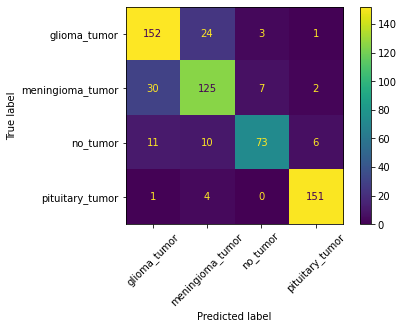

In [37]:
#plot the confusion matrix
cm = confusion_matrix(y_test, linear_pred, labels=linear.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=linear.classes_)
disp.plot(cmap='viridis', xticks_rotation='45')
plt.show()